In [2]:
#Import packages and fix figure quality when exporting
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png','pdf')

# Exercise 1{-}

In [3]:
#Load data
data = np.loadtxt('.\smoking.txt') 
FEV1_smoker = data[data[:,4]==1.][:,1]
FEV1_non_smoker = data[data[:,4]==0.][:,1]
average_FEV1_smoker = np.mean(FEV1_smoker) 
average_FEV1_non_smoker = np.mean(FEV1_non_smoker) 
print(average_FEV1_smoker)
print(average_FEV1_non_smoker)

3.2768615384615383
2.5661426146010187


The average lung function, measured in FEV1, for smokers is 3.2769 L and for non-smokers the average lung function, measured in FEV1, is 2.5661 L. The average lung function for smokers is thus higher than for non-smokers, which is surprising. 

# Exercise 2{-}

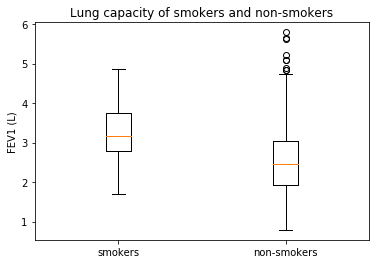

In [4]:
plt.figure()
plt.boxplot([FEV1_smoker, FEV1_non_smoker])
plt.xticks([1,2],['smokers', 'non-smokers',])
plt.ylabel('FEV1 (L)')
plt.title('Lung capacity of smokers and non-smokers')
plt.show()

The boxplot above shows the lung function of smokers and non-smokers, measured in FEV1. The values of FEV1 for non-smokers are more widely spread than for smokers. Also flyers are seen for non-smokers and not for smokers. 

# Exercise 3{-}

I use the two-sided t-test for "Equal or unequal sample sizes, similar variances" as defined on [Wikipedia.](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test)

In [5]:
#degrees of freedom
v=len(FEV1_smoker)+len(FEV1_non_smoker)-2
print(v)

652


In [6]:
#t-statistic
s_p=np.sqrt(((len(FEV1_smoker)-1)*np.var(FEV1_smoker)+(len(FEV1_non_smoker)-1)*np.var(FEV1_non_smoker))/v)
t=(average_FEV1_smoker-average_FEV1_non_smoker)/(s_p*np.sqrt((1/len(FEV1_smoker))+(1/len(FEV1_non_smoker))))
print(t)

6.473411327744889


In [7]:
#p-value
p=2*(1-stats.norm.cdf(np.abs(t)))
print(p)

9.581468951580518e-11


The value of degrees of freedom, v, is 652. The t-statistic is 6.4734. The p-value is 9.5815e-11 which is much smaller than the significance level α = 0.05. The null hypothesis, that the two populations of smokers and non-smokers have the same mean, is thus rejected. The t-test thus shows that there is a difference in the average lung function for smokers and non-smokers, but it does not say anything about the reason for this difference.    

# Exercise 4{-}

In [8]:
#correlation between age and FEV1
age = data[:,0]
FEV1 = data[:,1]
correlation = np.corrcoef(age,FEV1)
print(correlation)

[[1.         0.75645899]
 [0.75645899 1.        ]]


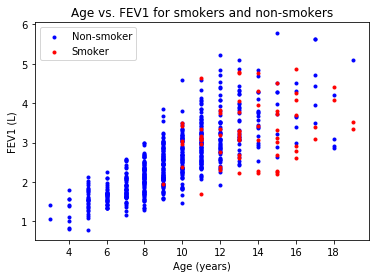

In [9]:
#2D plot of age vs. FEV1 for smokers and non-smokers
age_smoker = data[data[:,4]==1.][:,0]
age_non_smoker = data[data[:,4]==0.][:,0]

plt.figure()
plt.scatter(age_non_smoker, FEV1_non_smoker, c='b', marker='.', label='Non-smoker')
plt.scatter(age_smoker, FEV1_smoker, c='r', marker='.', label='Smoker')
plt.title('Age vs. FEV1 for smokers and non-smokers')
plt.xlabel('Age (years)')
plt.ylabel('FEV1 (L)')
plt.legend()
plt.show()


The correlation between age and FEV1 is 0.7565. On the 2D scatter plot it is seen how the age of non-smokers is more spread out than for smokers, and how for both smokers and non-smokers the lung function, measured in FEV1, seems to grow with increasing age. 

# Exercise 5{-}

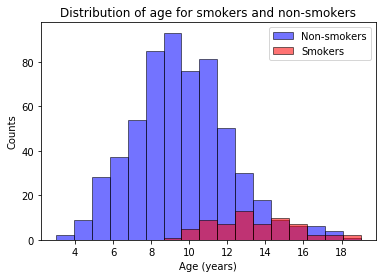

In [10]:
plt.figure()
plt.hist(age_non_smoker, len(np.unique(age)), (np.min(np.unique(age)), np.max(np.unique(age))), edgecolor='k', alpha=0.55, color='b', label='Non-smokers')
plt.hist(age_smoker, len(np.unique(age)), (np.min(np.unique(age)), np.max(np.unique(age))), edgecolor='k', alpha=0.55, color='r', label='Smokers')
plt.legend()
plt.title('Distribution of age for smokers and non-smokers')
plt.xlabel('Age (years)')
plt.ylabel('Counts')
plt.show()

On the two histograms it is seen how the age distribution for both smokers and non-smokers look somewhat normally distributed. The number of non-smokers is significantly larger than the number of smokers, which means the value of lung function for the individual smoker will have a greater impact on the mean than the indvidual non-smoker. This might explain the surprising result from exercise 1, that smokers have a greater average lung function than non-smokers. Worth noting is also how the histogram for non-smokers is centered around a smaller age than the histogram for smokers, and as seen on the scatter plot in exercise 4, there is a trend towards higher lung function for higher ages. 